In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Tool wear [min]']=df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]']=df['Rotational speed [rpm]'].astype('float64')


In [9]:
# Rename features
df.rename(columns={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, inplace=True)

In [10]:
df.head(2)

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure


In [11]:
df['Product ID']=df['Product ID'].apply(lambda x: x[1:])
df['Product ID']=pd.to_numeric(df['Product ID'])

<Axes: xlabel='Product ID', ylabel='Count'>

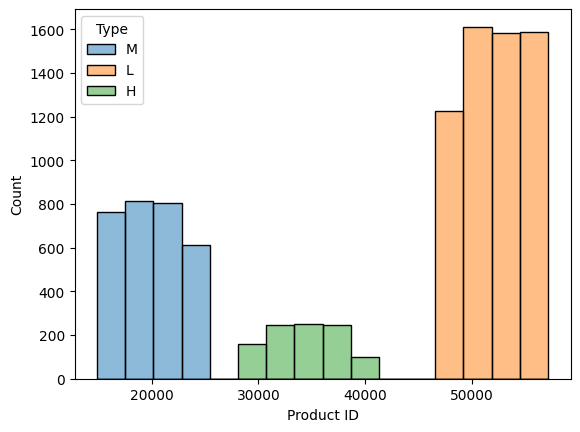

In [12]:
sns.histplot(x=df['Product ID'],hue=df['Type'])

In [13]:
print('M min',df.loc[df['Type']=='M','Product ID'].min())
print('M max',df.loc[df['Type']=='M','Product ID'].max())
print('L min',df.loc[df['Type']=='L','Product ID'].min())
print('L max',df.loc[df['Type']=='L','Product ID'].max())
print('H min',df.loc[df['Type']=='H','Product ID'].min())
print('H max',df.loc[df['Type']=='H','Product ID'].max())

M min 14860
M max 24859
L min 47181
L max 57174
H min 29424
H max 39412


In [14]:
df.loc[df['Type']=='M','Product ID'].max()-df.loc[df['Type']=='M','Product ID'].min()

9999

In [15]:
df.loc[df['Type']=='L','Product ID'].max()-df.loc[df['Type']=='L','Product ID'].min()

9993

In [16]:
df.loc[df['Type']=='H','Product ID'].max()-df.loc[df['Type']=='H','Product ID'].min()

9988

In [17]:
df.loc[df['Type']=='M','Target'].sum()/df.loc[df['Type']=='M','Type'].count()*100

2.7694361027694363

In [18]:
df.loc[df['Type']=='L','Target'].sum()/df.loc[df['Type']=='L','Type'].count()*100

3.916666666666667

In [19]:
df.loc[df['Type']=='H','Target'].sum()/df.loc[df['Type']=='H','Type'].count()*100

2.0937188434695915

In [20]:
# percentage of motors of different types
df['Type'].value_counts()/df.shape[0]*100

L    60.00
M    29.97
H    10.03
Name: Type, dtype: float64

so here i have basically observed that 
low type motors have 3.91% failure
medium type motors have 2.76% failures
High type motors have 2.09% failures

* Drop ID columns.\
here basically there are two id columns, it is common sense that identification of machine will not helpful to prdict failure so we will drop them

In [21]:
df.drop(columns=['UDI','Product ID'],inplace=True)

In [22]:
df.head(1)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure


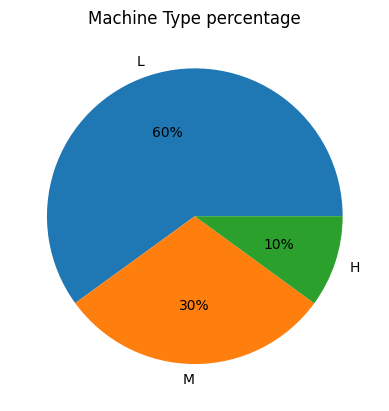

In [23]:
# Pie chart of Type percentage
value = df['Type'].value_counts()
Type_percentage = 100*value/df.Type.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Machine Type percentage')
plt.show()

### Target Anamolies

In [24]:
anamoly_1_id=df.loc[(df['Target']==0) & (df['Failure Type']!='No Failure'),['Target','Failure Type']].index
anamoly_2_id=df.loc[(df['Target']==1) & (df['Failure Type']=='No Failure'),['Target','Failure Type']].index

there are 9 quantities such that in target they are mentioned 1 means failure.\
But in failure type it is mentioned No failure

18 observation are such that in target they are given 0 means no failure. but in failure type they are mentioned random failure.

so we will remove such ambigeous observations

In [25]:
df.drop(index=anamoly_1_id,inplace=True)
df.drop(index=anamoly_2_id,inplace=True)

so total 18 + 9 =27 observation we have romved as they are ambiguou

### Outliers

In [26]:
# Create lists of features and target names
features = [col for col in df.columns
            if df[col].dtype=='float64' or col =='Type']

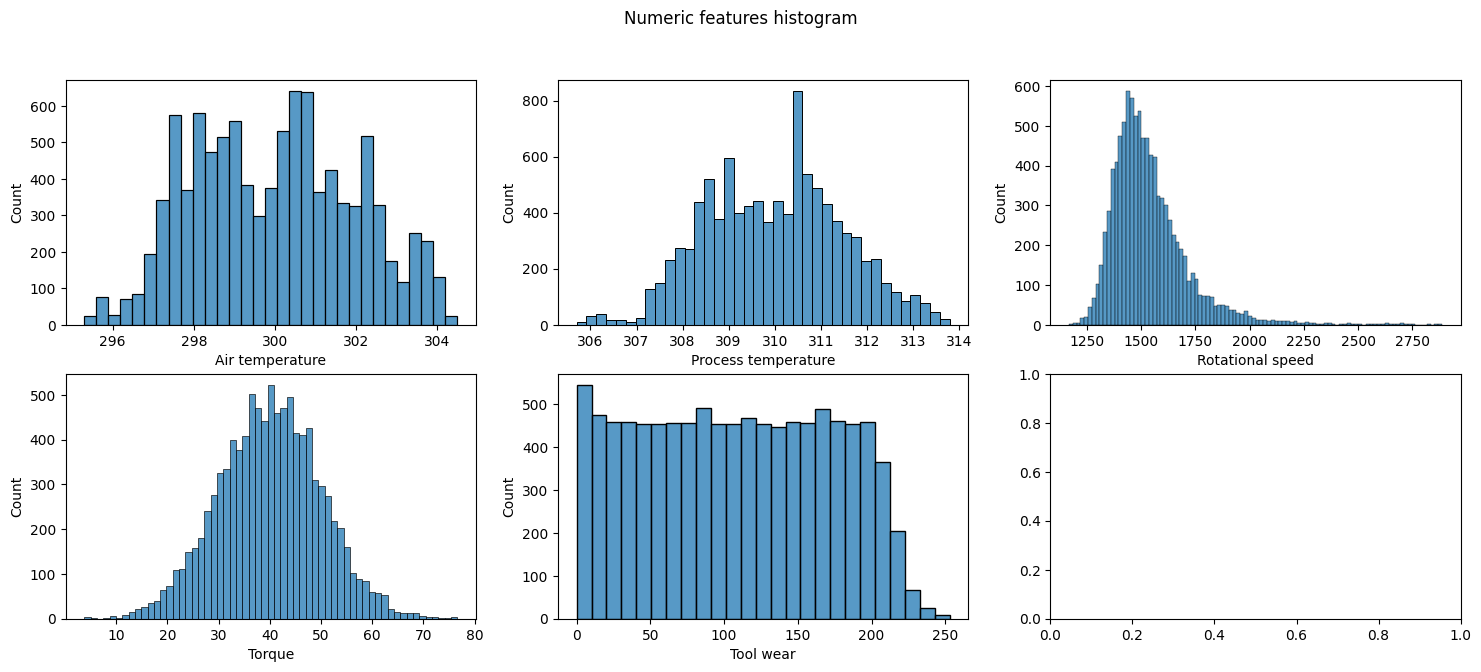

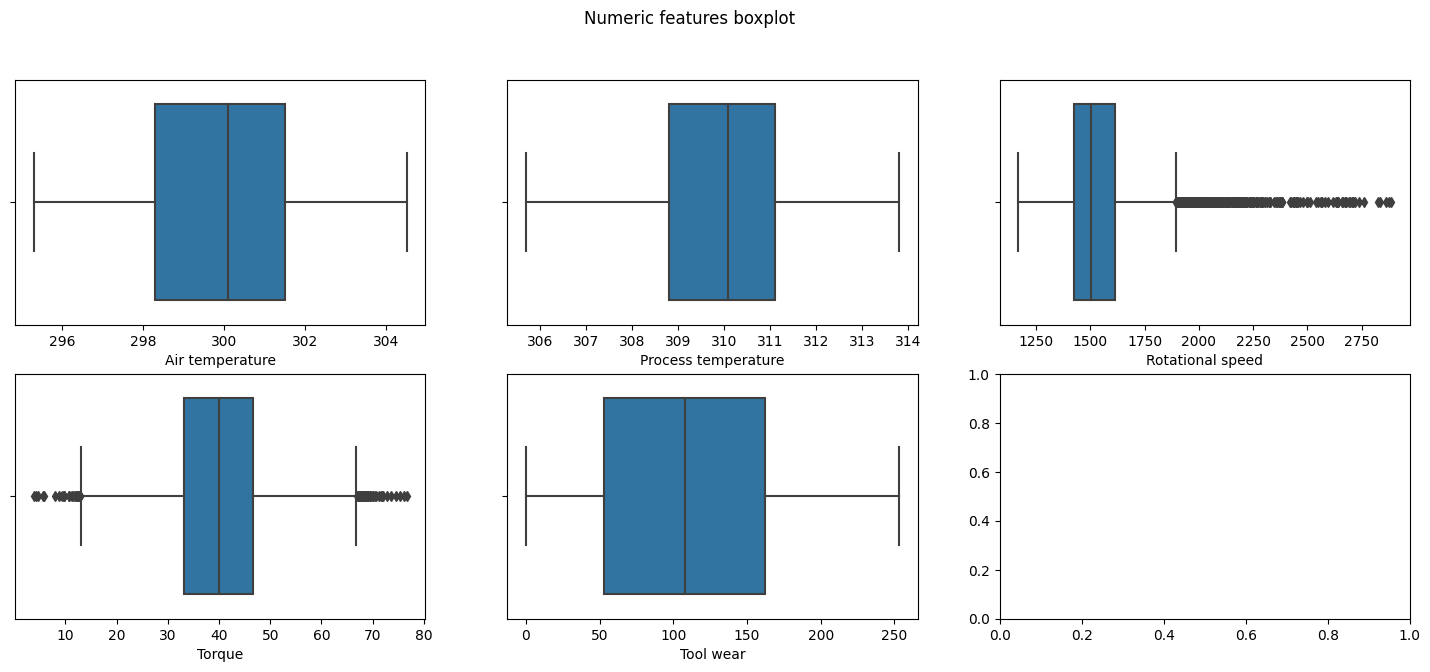

In [27]:
num_features = [feature for feature in features if df[feature].dtype=='float64']

# Histograms of numeric features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features histogram')

fig.suptitle('Numeric features histogram')

for j, feature in enumerate(num_features):
    sns.histplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()


# boxplot of numeric features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sns.boxplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()


box plot showing rpm and torque has outliers. we can see that high range of rpm is upto 2750 and rpm can go upto that value
and higher rpm torque reduces. we will keep them

### Resampling

In [28]:
df['Target'].value_counts()/df.shape[0]*100

0    96.691066
1     3.308934
Name: Target, dtype: float64

96 % data belongs to class 0 and only 3.3% data belongs to class 1.  so this is imbalance.\
we will keep this non failure to failure ration upto 80:20.\
so we will resample our data accordingly using SMOTE.

- Also we are having 4 types of failures. so basically we can predict failure or non failure or we can also predict exact failure type(Multiclass problem).
- lets see percentage of each class

Failures percentage in data: 3.31


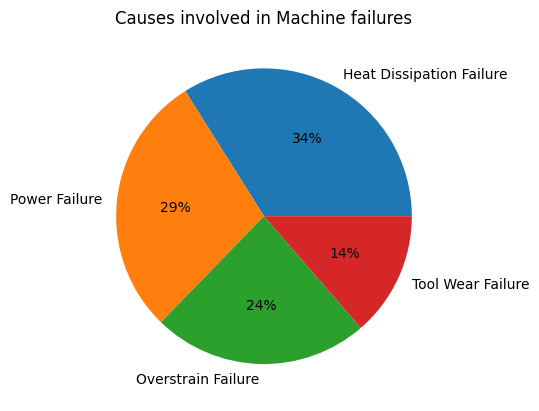

In [29]:
# Portion of df where there is a failure and causes percentage
idx_fail = df.loc[df['Failure Type'] != 'No Failure'].index
df_fail = df.loc[idx_fail]
df_fail_percentage = 100*df_fail['Failure Type'].value_counts()/df_fail['Failure Type'].shape[0]
print('Failures percentage in data:',
      round(100*df['Target'].sum()/df.shape[0],2))
# Pie plot
plt.title('Causes involved in Machine failures')
plt.pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors=sns.color_palette('tab10')[0:4], autopct='%.0f%%')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

In [31]:
# n_working must represent 80% of the desired length of resampled dataframe



In [32]:
n_working=df['Failure Type'].value_counts()['No Failure']
desired_length = round(n_working/0.8)

spc = round((desired_length-n_working)/4)  #samples per class

# Resampling
length_of_each_class = {'No Failure':n_working,
                 'Overstrain Failure':spc,
                 'Heat Dissipation Failure':spc,
                 'Power Failure':spc,
                 'Tool Wear Failure':spc}

sm=SMOTENC(categorical_features=[0,7],sampling_strategy=length_of_each_class,random_state=100)
df_res, y_res = sm.fit_resample(df, df['Failure Type'])

In [33]:
df_res['Target'].value_counts()/df_res.shape[0]*100

0    79.991705
1    20.008295
Name: Target, dtype: float64

### Comaparision after resampling

In [34]:
# Portion of df_res where there is a failure and causes percentage
idx_fail_res = df_res.loc[df_res['Failure Type'] != 'No Failure'].index
df_res_fail = df_res.loc[idx_fail_res]
fail_res_percentage = 100*df_res_fail['Failure Type'].value_counts()/df_res_fail.shape[0]

In [35]:
fail_res_percentage

Power Failure               25.0
Tool Wear Failure           25.0
Overstrain Failure          25.0
Heat Dissipation Failure    25.0
Name: Failure Type, dtype: float64

In [36]:
# Percentages
print('Percentage increment of observations after oversampling:',
      round((df_res.shape[0]-df.shape[0])*100/df.shape[0],2))
print('SMOTE Resampled Failures percentage:',
      round(df_res_fail.shape[0]*100/df_res.shape[0],2))

Percentage increment of observations after oversampling: 20.88
SMOTE Resampled Failures percentage: 20.01


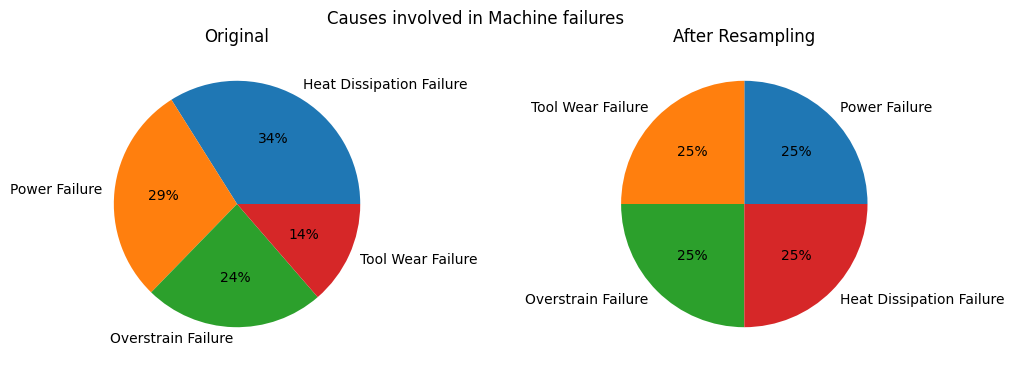

In [37]:
# Pie plot
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('Causes involved in Machine failures')
axs[0].pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors=sns.color_palette('tab10')[0:4], autopct='%.0f%%')
axs[1].pie(x=fail_res_percentage.array, labels=fail_res_percentage.index.array,
        colors=sns.color_palette('tab10')[0:4], autopct='%.0f%%')
axs[0].title.set_text('Original')
axs[1].title.set_text('After Resampling')
plt.show()

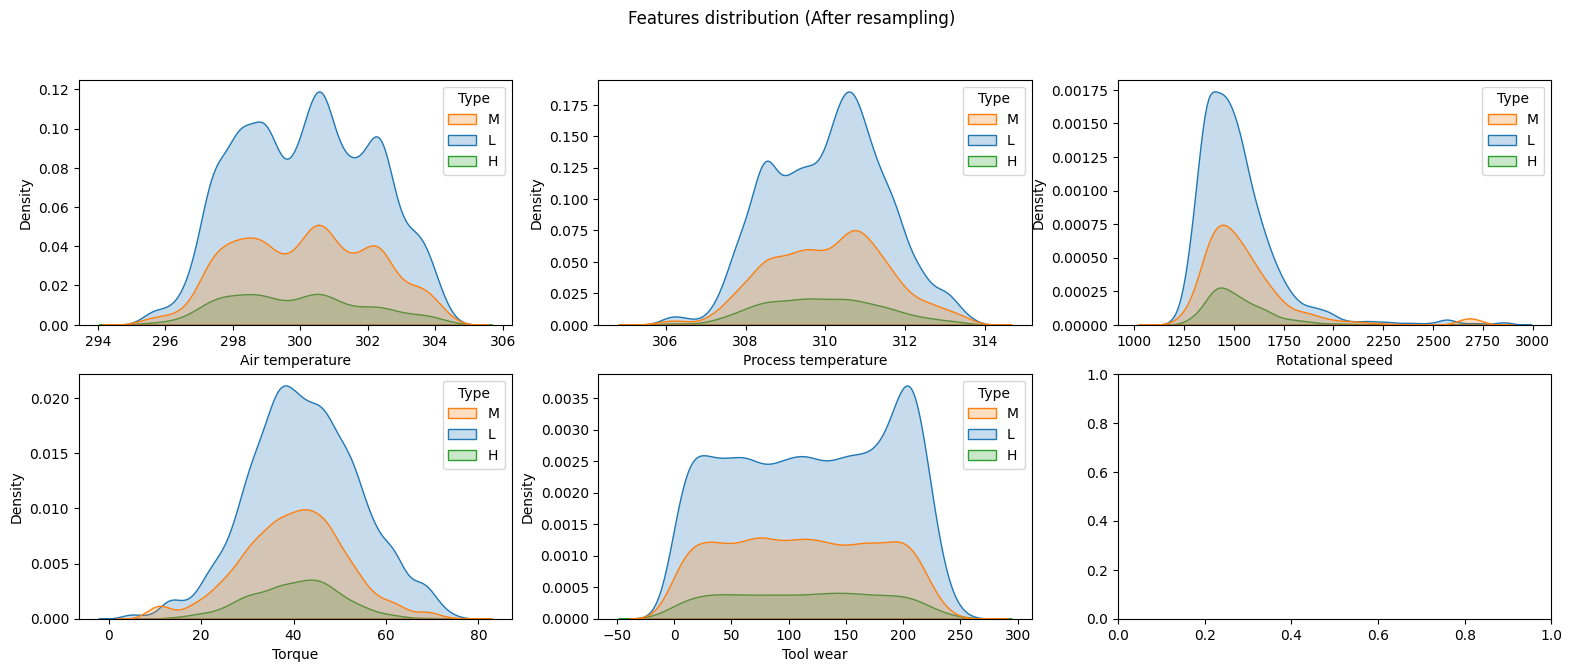

In [38]:
# Kdeplot of numeric features (After resampling) - hue=Type
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,7))
fig.suptitle('Features distribution (After resampling)')
custom_palette = {'L':'tab:blue', 'M':'tab:orange', 'H':'tab:green'}
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_res, x=feature,
              hue='Type', fill=True, palette=custom_palette)
plt.show()

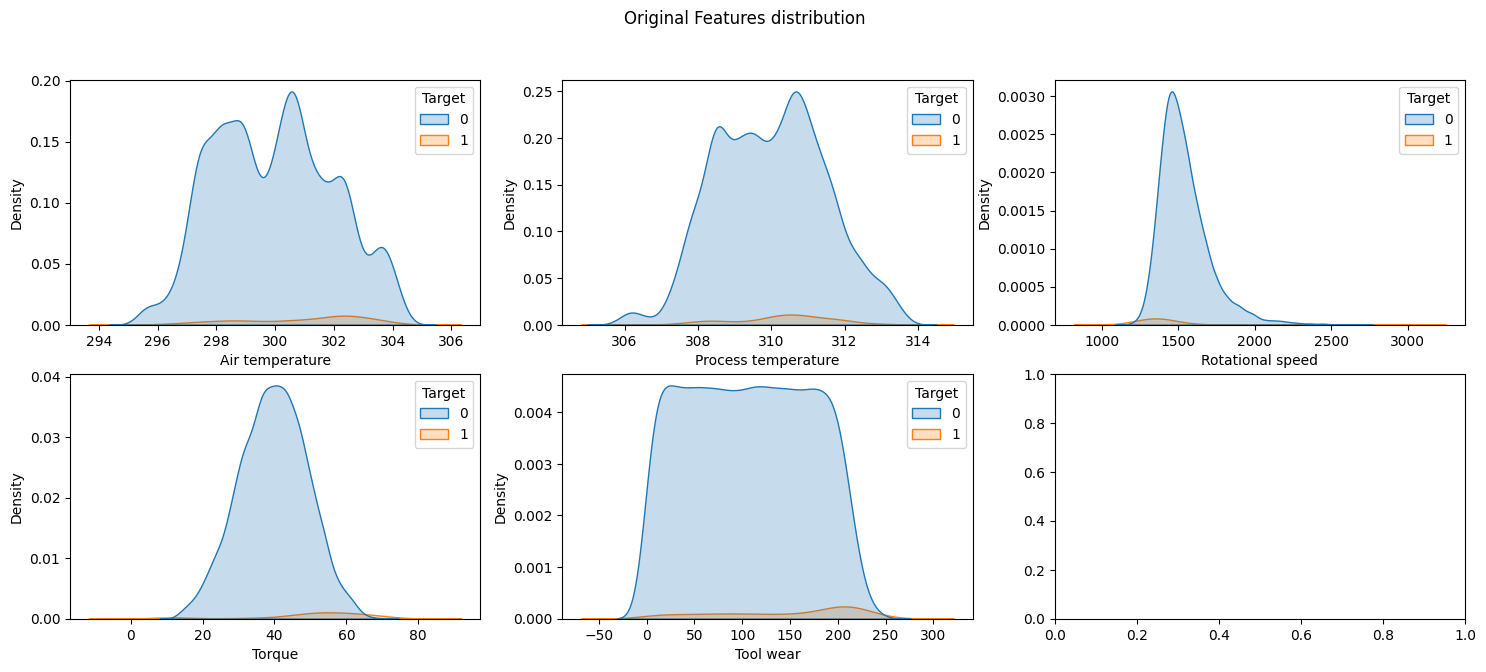

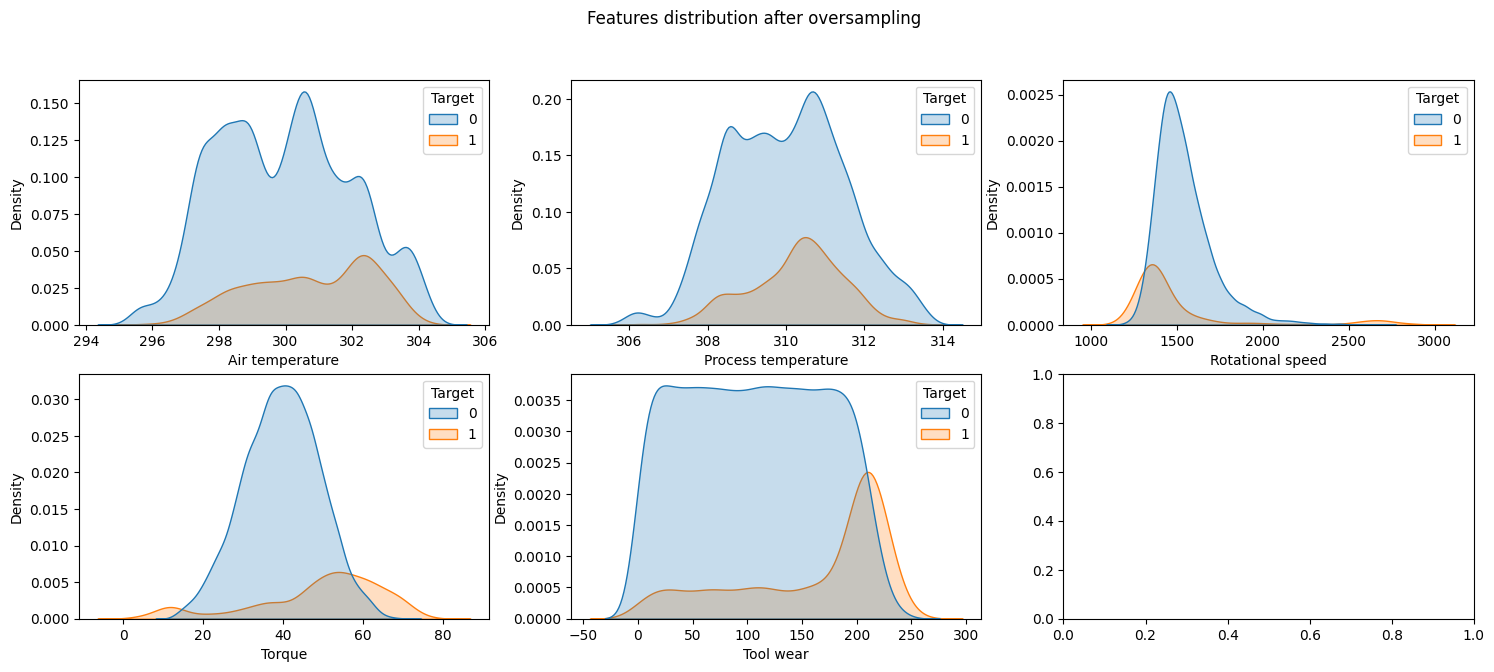

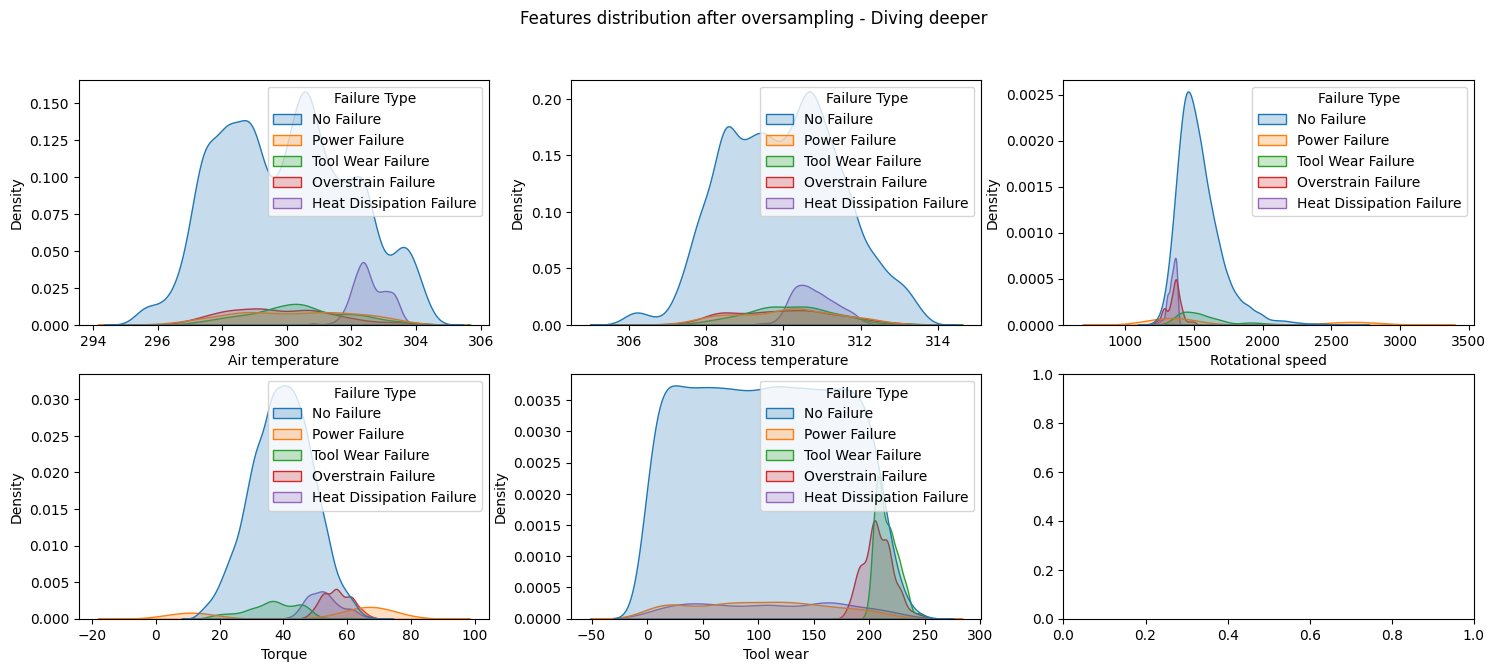

In [39]:
# Kdeplot of numeric features (Original)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Original Features distribution')
enumerate_features = enumerate(num_features)
for j, feature in enumerate_features:
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature,
                hue='Target', fill=True, palette='tab10')
plt.show()
# Kdeplot of numeric features (After resampling)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Features distribution after oversampling')
enumerate_features = enumerate(num_features)
for j, feature in enumerate_features:
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_res, x=feature,
                hue=df_res['Target'], fill=True, palette='tab10')
plt.show()
# Kdeplot of numeric features (After resampling) - Diving deeper
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Features distribution after oversampling - Diving deeper')
enumerate_features = enumerate(num_features)
for j, feature in enumerate_features:
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_res, x=feature,
                hue=df_res['Failure Type'], fill=True, palette='tab10')

- The first thing we can observe is that the data augmentation was performed succesfully, as the feature distribution for faulty instancies have not been significantly distorted.

- The first thing we can observe is that the data augmentation was performed succesfully, as the feature distribution for faulty instancies have not been significantly distorted. 
- It should also be noted that in Rotational Speed, Torque and Tool Wear the observations relating to failures have a density peak in extreme zones of the distribution. This implies that the outliers we discussed are not to be imputed to mistakes in the dataset building but rather to the natural variance of the same. 
- This becomes even clearer when observing the distributions relative to the single causes of failure: in particular, an almost symmetrical behavior is recognized in Rotational Speed and Torque while in Tool Wear a clear separation is observed between PWF and HDF failures on lower values, and the peaks that are found at higher values relative to TWF and OSF. 
- This is perfectly consistent with the description of the targets reported in the "Task and dataset description" section.

### Feature scaling and encoding

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
type_dict = {'L': 0, 'M': 1, 'H': 2}
cause_dict = {'No Failure': 0,
              'Power Failure': 1,
              'Overstrain Failure': 2,
              'Heat Dissipation Failure': 3,
              'Tool Wear Failure': 4}
df_pre = df_res.copy()
# Encoding
df_pre['Type'].replace(to_replace=type_dict, inplace=True)
df_pre['Failure Type'].replace(to_replace=cause_dict, inplace=True)
# Scaling
df_pre[num_features] = sc.fit_transform(df_pre[num_features]) 

In [41]:
df_pre.sample(5)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
920,1,-2.331522,-2.888203,-0.069682,0.224593,1.137888,0,0
4279,1,0.843140,-0.032996,1.110847,-1.496557,1.197062,0,0
7589,0,0.188051,0.872314,-0.262696,0.412044,-1.007163,0,0
9817,2,-0.920561,-0.659749,-0.222298,-0.380366,-1.317825,0,0
291,0,-1.071735,-1.216862,-0.271674,0.096784,-0.149142,0,0


### PCA and Correlation Heatmap

- We run PCA to have a further way of displaying the data instead of making feature selection.

In [42]:
pca=PCA(n_components=len(num_features))
X_pca=pd.DataFrame(data=pca.fit_transform(df_pre[num_features]),columns=['PC'+str(i+1) for i in range(len(num_features))])

In [43]:
var_exp=pd.Series(data=pca.explained_variance_ratio_*100,index=['PC'+str(i+1) for i in range(len(num_features))])
print('variance explained by pc components :',round(var_exp,2),sep='\n')

variance explained by pc components :
PC1    37.67
PC2    36.84
PC3    19.83
PC4     3.06
PC5     2.60
dtype: float64


In [44]:
print('variance explained by first 3 components -',round(var_exp[:3].sum(),2),'%')

variance explained by first 3 components - 94.34 %


In [45]:
# PCA for Data visualization
pca3 = PCA(n_components=3)

X_pca3 = pd.DataFrame(data=pca3.fit_transform(df_pre[num_features]), columns=['PC1','PC2','PC3'])

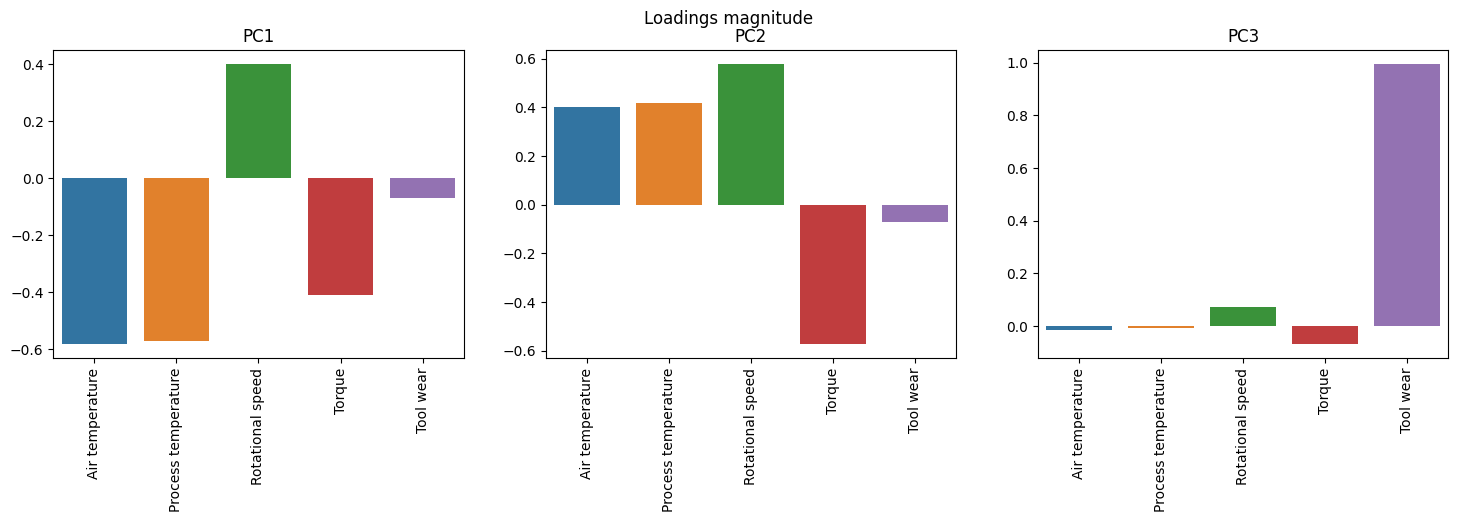

In [46]:
# Loadings Analysis
fig, axs = plt.subplots(ncols=3, figsize=(18,4))
fig.suptitle('Loadings magnitude')
pca_loadings = pd.DataFrame(data=pca3.components_, columns=num_features)
for j in range(3):
    ax = axs[j]
    sns.barplot(ax=ax, x=pca_loadings.columns, y=pca_loadings.values[j])
    ax.tick_params(axis='x', rotation=90)
    ax.title.set_text('PC'+str(j+1))
plt.show()  

**The bar plot of Principal Components weights makes easy to understand what they represent:**

PC1 is closely related to the two temperature data;\
PC2 can be identified with the machine power, which is the product of Rotational Speed and Torque;\
PC3 is identifiable with Tool Wear.

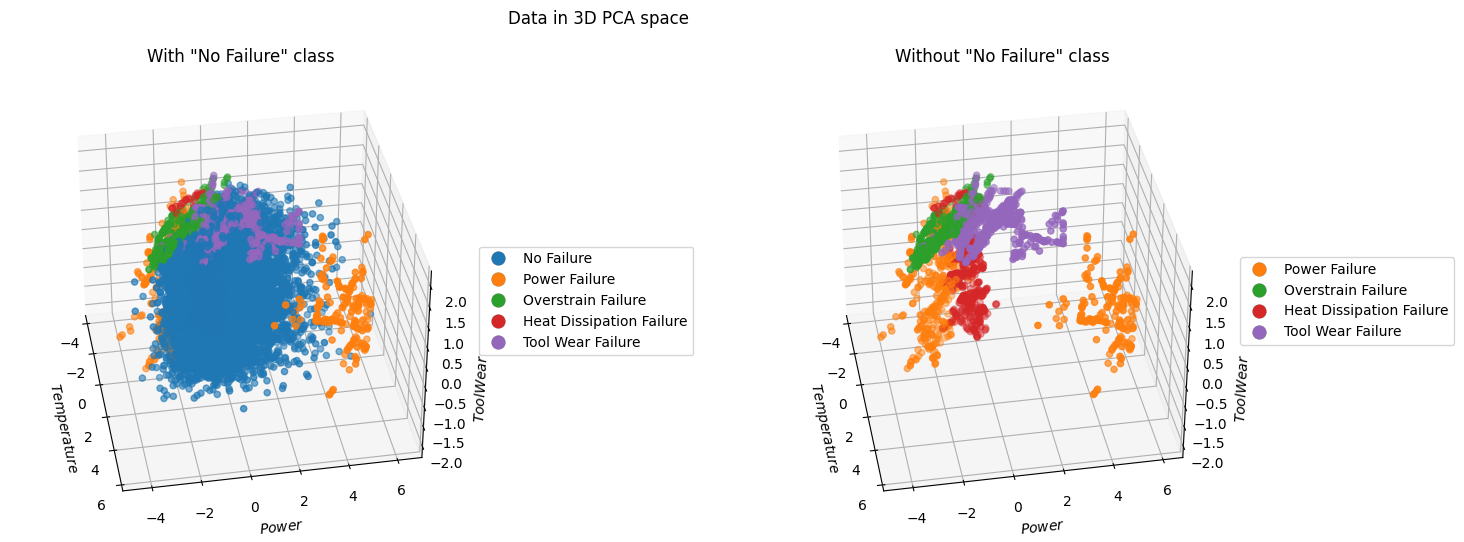

In [47]:
X_pca3.rename(mapper={'PC1':'Temperature',
                      'PC2':'Power',
                      'PC3':'Tool Wear'}, axis=1, inplace=True)

# PCA plot
color = []
col = df_pre['Failure Type'].map({0:'tab:blue',1:'tab:orange',2:'tab:green',3:'tab:red',4:'tab:purple'})
color.append(col)
idx_w = col[col == 'tab:blue'].index
color.append(col.drop(idx_w))
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
labelTups = [('No Failure','tab:blue'),
             ('Power Failure', 'tab:orange'),
             ('Overstrain Failure','tab:green'),
             ('Heat Dissipation Failure', 'tab:red'),
             ('Tool Wear Failure','tab:purple')]

fig = plt.figure(figsize=(18,6))
fig.suptitle('Data in 3D PCA space')
full_idx = X_pca3.index

for j, idx in enumerate([full_idx,idx_fail_res]):
    ax = fig.add_subplot(1, 2, j+1, projection='3d')

    lg = ax.scatter(X_pca3.loc[idx,'Temperature'],
                    X_pca3.loc[idx,'Power'],
                    X_pca3.loc[idx,'Tool Wear'],
                    c=color[j])
    ax.set_xlabel('$Temperature$')
    ax.set_ylabel('$Power$')
    ax.set_zlabel('$Tool Wear$')
    ax.title.set_text('With'+str(j*'out')+' "No Failure" class')
    ax.view_init(35, -10) 
    custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                               mec='k', mfc=c, mew=.1, ms=20) for c in colors[j:]]
    ax.legend(custom_lines, [lt[0] for lt in labelTups[j:]], 
              loc='center left', bbox_to_anchor=(1.0, .5))
      
plt.show() 

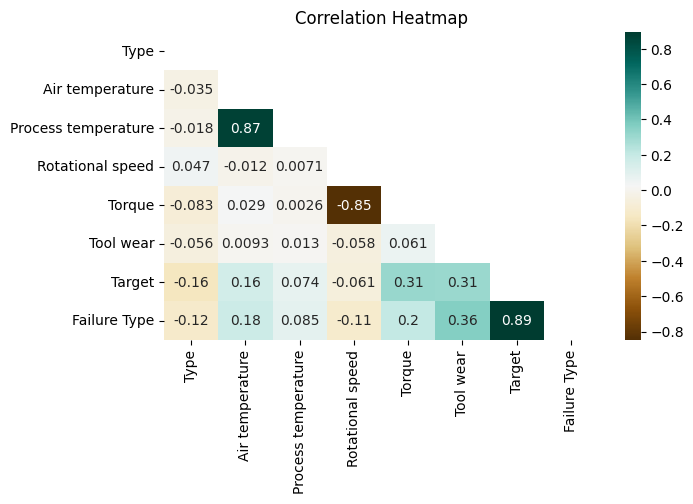

In [48]:
# Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(data=df_pre.corr(), mask=np.triu(df_pre.corr()), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

Unsurprisingly, we observe that the features related to temperature, as well as those related to power, are widely correlated. Furthermore, Tool Wear correlates well with both of our targets, confirming what we have observed by studying PCA. Finally, a less strong correlation is also observed between the torsion and the two targets.

#### Metrics

To evaluate the models we will use from a quantitative point of view, we resort to some metrics
that summarize some characteristics of the classification results:
* Accuracy: expresses the fraction of instances that are classified correctly, it is the most intuitive metric that is usually used in classification tasks.
$$ Accuracy = \frac{TP + TN}{TP + TN + FT + FN} $$
* AUC: can be considered as a measure of the separation between True Positives and True Negatives, that is, the ability of the model to distinguish between classes. In detail, it represents the area below the ROC curve, given by the estimate of the True Positive Rate (Recall) for each possible value of the True Negative Rate).
* F1: reports the classification capacity of the model to Precision and Recall, giving both the same weight.
$$F1 = 2\frac{Precision * Recall}{Precision + Recall}$$
Although generally effective, AUC can be optimistic in the case of highly unbalanced
classes, as happens in the binary task, while the F1 score is more reliable in this kind of scenario.
We consider this last metric particularly significant as it is able to mediate the cases in which
the machines that are about to fail are classified as functioning (Recall) and the one in which
functioning machines are classified as about to suffer a failure (Precision). To be more specific
we will give more importance to Recall than Precision, by evaluating also an "adjusted" version
of the F1 through a β parameter:
$$F_\beta = (1 + \beta^2)\frac{Precision * Recall}{\beta^2  Precision + Recall}$$
With the choice $\beta = 2$ (common in literature) a greater influence of the Recall is obtained.
This choice is motivated by the fact that in order to optimize the costs for the maintenance of
the machinery it is a good thing to limit the purchase of unnecessary replacement materials but
it results far more important to avoid the possibility of having to replace a machinery after it is
broken, since this second scenario generally has higher costs.

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import time

# train-validation-test split
X, y = df_pre[features], df_pre[['Target','Failure Type']]
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, stratify=df_pre['Failure Type'], random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.11, stratify=y_trainval['Failure Type'], random_state=0)



In [94]:
y['Failure Type'].value_counts()

0    9643
1     603
4     603
2     603
3     603
Name: Failure Type, dtype: int64

In [95]:
df['Failure Type'].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [85]:
X.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1,-1.021344,-1.007945,0.078445,0.113825,-1.732042
1,0,-0.970952,-0.938306,-0.563439,0.412044,-1.687662
2,0,-1.021344,-1.077584,-0.159456,0.676181,-1.658075
3,0,-0.970952,-1.007945,-0.451222,-0.167352,-1.628488
4,0,-0.970952,-0.938306,-0.563439,-0.124750,-1.598901


In [50]:
features

['Type',
 'Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear']

In [51]:
"""User-defined function: Evaluate cm, accurcay, AUC, F1 for a given classifier
- model, fitted estimator.
- X, data used to estimate class probabilities (paired with y_true)
- y_true, ground truth with two columns
- y_pred, predictions
- task = 'binary','multi_class'
"""
def eval_preds(model,X,y_true,y_pred,task):
    if task == 'binary':
        # Extract task target
        y_true = y_true['Target']
        cm = confusion_matrix(y_true, y_pred)
        # Probability of the minority class
        proba = model.predict_proba(X)[:,1]
        # Metrics
        acc = accuracy_score(y_true, y_pred)
        auc = roc_auc_score(y_true, proba)
        f1 = f1_score(y_true, y_pred, pos_label=1)
        f2 = fbeta_score(y_true, y_pred, pos_label=1, beta=2)
    elif task == 'multi_class':
        y_true = y_true['Failure Type']
        cm = confusion_matrix(y_true, y_pred)
        proba = model.predict_proba(X)
        # Metrics
        acc = accuracy_score(y_true, y_pred)
        auc = roc_auc_score(y_true, proba, multi_class='ovr', average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        f2 = fbeta_score(y_true, y_pred, beta=2, average='weighted')
    metrics = pd.Series(data={'ACC':acc, 'AUC':auc, 'F1':f1, 'F2':f2})
    metrics = round(metrics,3)
    return cm, metrics



"""User-defined function: Fits one estimator using GridSearch to search for the best parameters
- clf, estimator
- X, y = X_train, y_train
- params, parameters grid for GridSearch
- task = 'binary','multi_class'
"""
def tune_and_fit(clf,X,y,params,task):
    if task=='binary':
        f2_scorer = make_scorer(fbeta_score, pos_label=1, beta=2)
        start_time = time.time()
        grid_model = GridSearchCV(clf, param_grid=params,
                                cv=5, scoring=f2_scorer)
        grid_model.fit(X, y['Target'])
    elif task=='multi_class':
        f2_scorer = make_scorer(fbeta_score, beta=2, average='weighted')
        start_time = time.time()
        grid_model = GridSearchCV(clf, param_grid=params,
                              cv=5, scoring=f2_scorer)
        grid_model.fit(X, y['Failure Type'])
        
    print('Best params:', grid_model.best_params_)
    # Print training times
    train_time = time.time()-start_time
    mins = int(train_time//60)
    print('Training time: '+str(mins)+'m '+str(round(train_time-mins*60))+'s')
    return grid_model



"""User-defined function: Makes predictions using the tuned classifiers.
Then uses eval_preds to compute the relative metrics. Returns:
- y_pred, DataFrame containing the predictions of each model
- cm_list, confusion matrix list
- metrics, DataFrame containing the metrics
Input:
- fitted_models, fitted estimators
- X, data used to make predictions
- y_true, true values for target
- clf_str, list containing estimators names
- task = 'binary','multi_class'
"""
def predict_and_evaluate(fitted_models,X,y_true,clf_str,task):
    cm_dict = {key: np.nan for key in clf_str}
    metrics = pd.DataFrame(columns=clf_str)
    y_pred = pd.DataFrame(columns=clf_str)
    for fit_model, model_name in zip(fitted_models,clf_str):
        # Update predictions
        y_pred[model_name] = fit_model.predict(X)
        # Metrics
        if task == 'binary':
            cm, scores = eval_preds(fit_model,X,y_true,
                                     y_pred[model_name],task)
        elif task == 'multi_class':
            cm, scores = eval_preds(fit_model,X,y_true,
                                     y_pred[model_name],task)
        # Update Confusion matrix and metrics
        cm_dict[model_name] = cm
        metrics[model_name] = scores
    return y_pred, cm_dict, metrics



"""User-defined function: Fit the estimators on multiple classifiers
- clf, estimators
- clf_str, list containing estimators names
- X_train,y_train, data used to fit models
- X_val,y_val, data used to validate models
"""

def fit_models(clf,clf_str,X_train,X_val,y_train,y_val):
    metrics = pd.DataFrame(columns=clf_str)
    for model, model_name in zip(clf, clf_str):
        model.fit(X_train,y_train['Target'])
        y_val_pred = model.predict(X_val)
        metrics[model_name] = eval_preds(model,X_val,y_val,y_val_pred,'binary')[1]
    return metrics

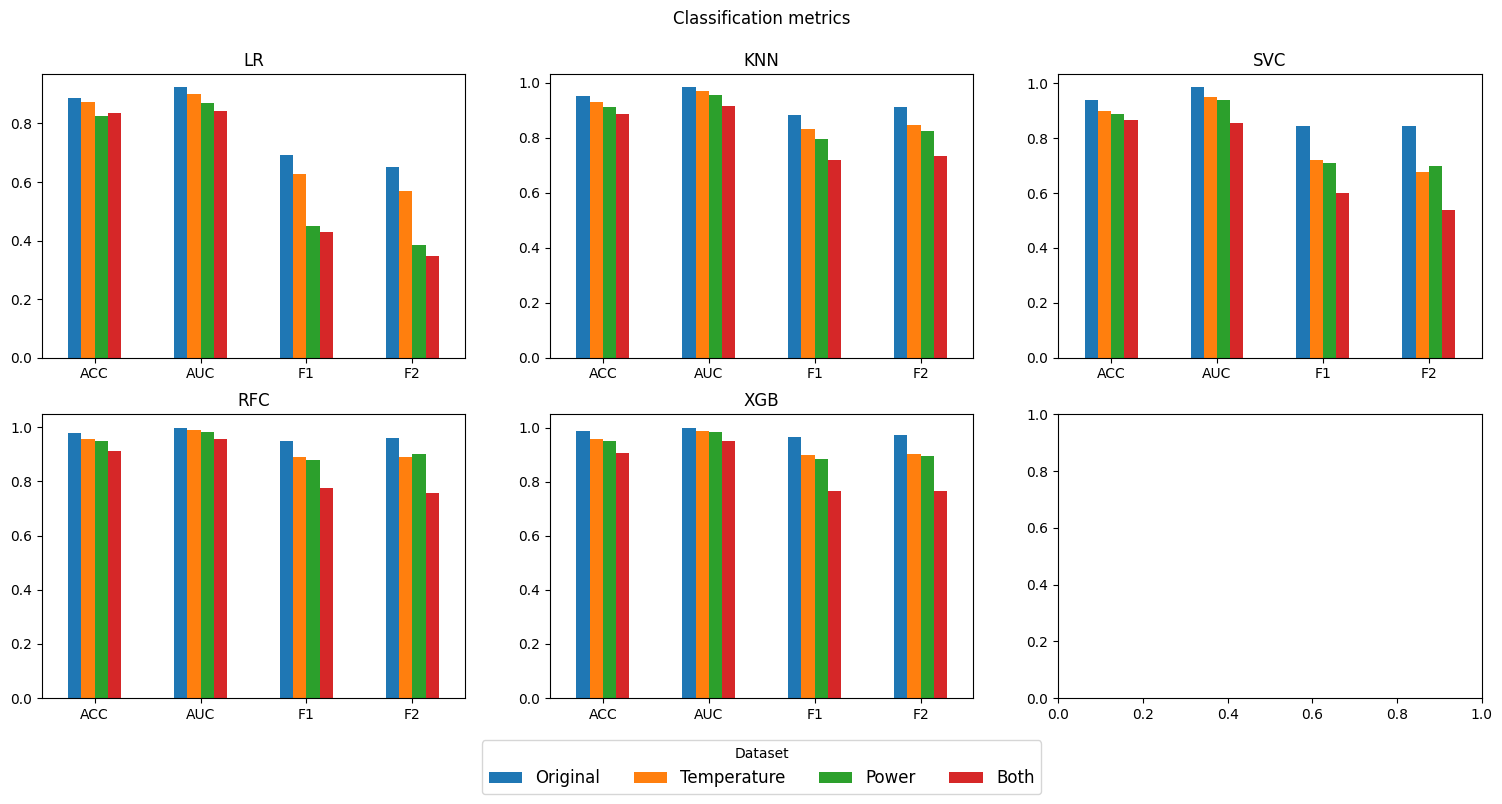

In [52]:
# Models
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
rfc = RandomForestClassifier()
xgb = XGBClassifier() 

clf = [lr,knn,svc,rfc,xgb]
clf_str = ['LR','KNN','SVC','RFC','XGB'] 

# Fit on raw train
metrics_0 = fit_models(clf,clf_str,X_train,X_val,y_train,y_val)

# Fit on temperature product train
XX_train = X_train.drop(columns=['Process temperature','Air temperature'])
XX_val = X_val.drop(columns=['Process temperature','Air temperature'])
XX_train['Temperature']= X_train['Process temperature']*X_train['Air temperature']
XX_val['Temperature'] = X_val['Process temperature']*X_val['Air temperature']
metrics_1 = fit_models(clf,clf_str,XX_train,XX_val,y_train,y_val)

# Fit on power product train
XX_train = X_train.drop(columns=['Rotational speed','Torque'])
XX_val = X_val.drop(columns=['Rotational speed','Torque'])
XX_train['Power'] = X_train['Rotational speed']*X_train['Torque']
XX_val['Power'] = X_val['Rotational speed']*X_val['Torque']     
metrics_2 = fit_models(clf,clf_str,XX_train,XX_val,y_train,y_val)

# Fit on both products train
XX_train = X_train.drop(columns=['Process temperature','Air temperature','Rotational speed','Torque'])
XX_val = X_val.drop(columns=['Process temperature','Air temperature','Rotational speed','Torque'])
XX_train['Temperature']= X_train['Process temperature']*X_train['Air temperature']
XX_val['Temperature']= X_val['Process temperature']*X_val['Air temperature']
XX_train['Power'] = X_train['Rotational speed']*X_train['Torque']
XX_val['Power'] = X_val['Rotational speed']*X_val['Torque']       
metrics_3 = fit_models(clf,clf_str,XX_train,XX_val,y_train,y_val)

# classification metrics barplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
fig.suptitle('Classification metrics')
for j, model in enumerate(clf_str):
    ax = axs[j//3,j-3*(j//3)]
    model_metrics = pd.DataFrame(data=[metrics_0[model],metrics_1[model],metrics_2[model],metrics_3[model]])
    model_metrics.index = ['Original','Temperature','Power','Both']
    model_metrics.transpose().plot(ax=ax, kind='bar', rot=0, )
    ax.title.set_text(model)
    ax.get_legend().remove()
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
axs.flatten()[-2].legend(title='Dataset', loc='upper center',
                         bbox_to_anchor=(0.5, -0.12), ncol=4, fontsize=12)
plt.show()

Validation set metrics:
ACC    0.888
AUC    0.923
F1     0.691
F2     0.652
dtype: float64
Test set metrics:
ACC    0.881
AUC    0.913
F1     0.649
F2     0.584
dtype: float64


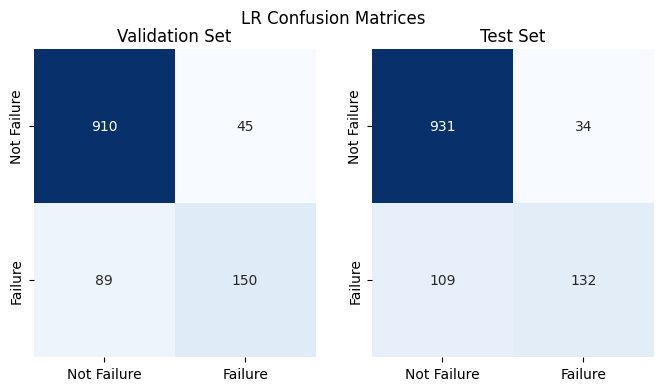

,feature,odds
4,Torque,17.274260
3,Rotational speed,9.881523
1,Air temperature,4.347222
5,Tool wear,3.610828
0,Type,0.539075
2,Process temperature,0.370395


In [53]:
# Make predictions
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train['Target'])
y_val_lr = lr.predict(X_val)
y_test_lr = lr.predict(X_test)

# Metrics
cm_val_lr, metrics_val_lr = eval_preds(lr,X_val,y_val,y_val_lr,'binary')
cm_test_lr, metrics_test_lr = eval_preds(lr,X_test,y_test,y_test_lr,'binary')
print('Validation set metrics:',metrics_val_lr, sep='\n')
print('Test set metrics:',metrics_test_lr, sep='\n')

cm_labels = ['Not Failure', 'Failure']
cm_lr = [cm_val_lr, cm_test_lr]
# Show Confusion Matrices
fig, axs = plt.subplots(ncols=2, figsize=(8,4))
fig.suptitle('LR Confusion Matrices')
for j, title in enumerate(['Validation Set', 'Test Set']):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_lr[j], annot=True,
              fmt='d', cmap='Blues', cbar=False)
    axs[j].title.set_text(title)
    axs[j].set_xticklabels(cm_labels)
    axs[j].set_yticklabels(cm_labels)
plt.show()

# Odds for interpretation
d = {'feature': X_train.columns, 'odds': np.exp(lr.coef_[0])}
odds_df = pd.DataFrame(data=d).sort_values(by='odds', ascending=False)
odds_df

### Models

In [54]:
# Models
knn = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
xgb = XGBClassifier() 
clf = [knn,svc,rfc,xgb]
clf_str = ['KNN','SVC','RFC','XGB']

# Parameter grids for GridSearch
knn_params = {'n_neighbors':[1,3,5,8,10]}
svc_params = {'C': [1, 10, 100],
              'gamma': [0.1,1],
              'kernel': ['rbf'],
              'probability':[True],
              'random_state':[0]}
rfc_params = {'n_estimators':[100,300,500,700],
              'max_depth':[5,7,10],
              'random_state':[0]}
xgb_params = {'n_estimators':[300,500,700],
              'max_depth':[5,7],
              'learning_rate':[0.01,0.1],
              'objective':['binary:logistic']}
params = pd.Series(data=[knn_params,svc_params,rfc_params,xgb_params],
                   index=clf)

# Tune hyperparameters with GridSearch (estimated time 8m)
print('GridSearch start')
fitted_models_binary = []
for model, model_name in zip(clf, clf_str):
    print('Training '+str(model_name))
    fit_model = tune_and_fit(model,X_train,y_train,params[model],'binary')
    fitted_models_binary.append(fit_model)

GridSearch start
Training KNN
Best params: {'n_neighbors': 1}
Training time: 0m 5s
Training SVC
Best params: {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Training time: 2m 8s
Training RFC
Best params: {'max_depth': 10, 'n_estimators': 500, 'random_state': 0}
Training time: 5m 8s
Training XGB
Best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'objective': 'binary:logistic'}
Training time: 0m 57s


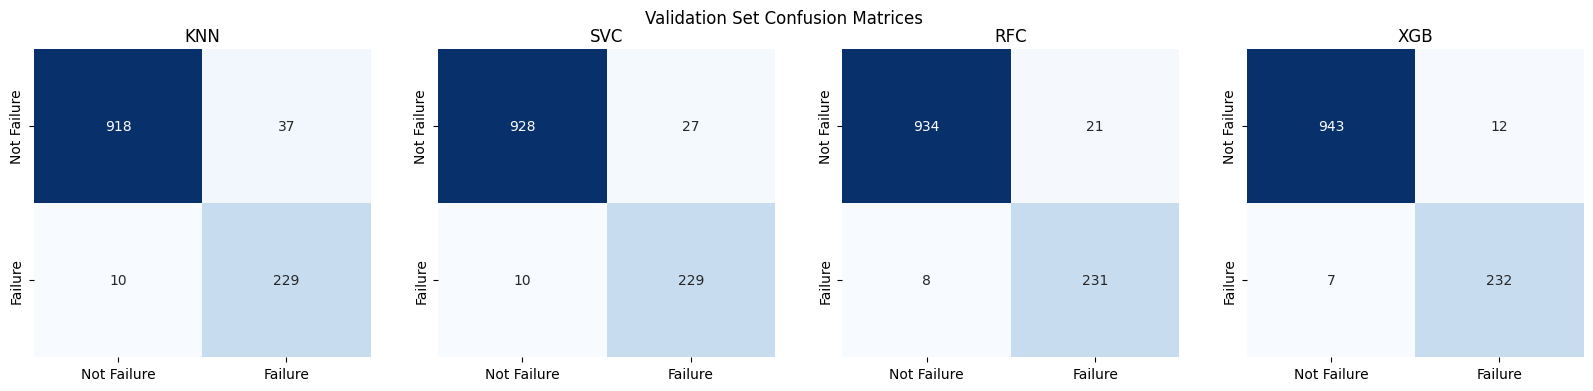

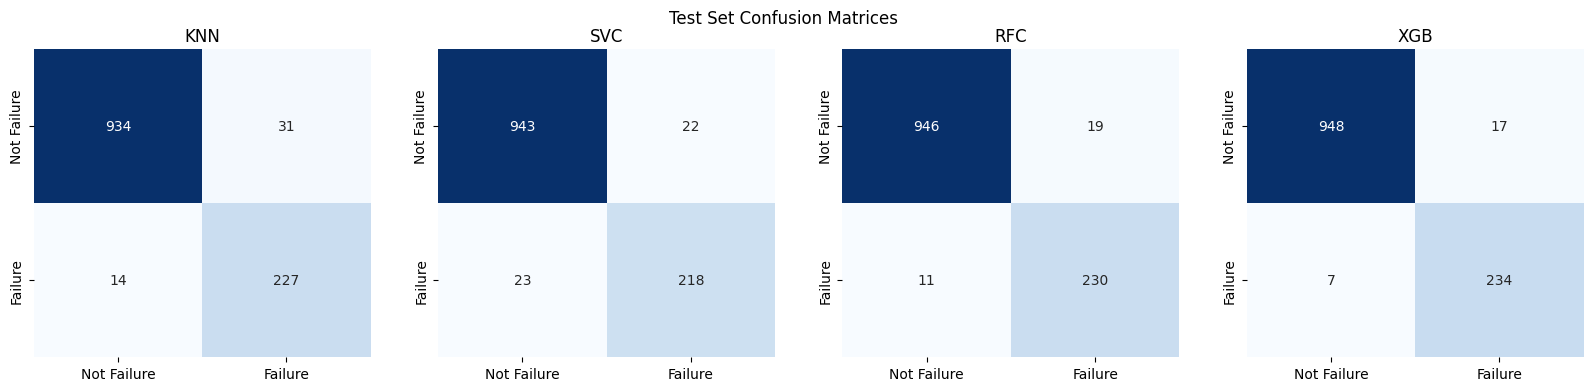


Validation scores:
       KNN    SVC    RFC    XGB
ACC  0.961  0.969  0.976  0.984
AUC  0.960  0.994  0.997  0.999
F1   0.907  0.925  0.941  0.961
F2   0.937  0.945  0.956  0.967
Test scores:
       KNN    SVC    RFC    XGB
ACC  0.963  0.963  0.975  0.980
AUC  0.955  0.988  0.996  0.998
F1   0.910  0.906  0.939  0.951
F2   0.929  0.905  0.948  0.963


In [55]:
# Create evaluation metrics
task = 'binary'
y_pred_val, cm_dict_val, metrics_val = predict_and_evaluate(
    fitted_models_binary,X_val,y_val,clf_str,task)
y_pred_test, cm_dict_test, metrics_test = predict_and_evaluate(
    fitted_models_binary,X_test,y_test,clf_str,task)

# Show Validation Confusion Matrices
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Validation Set Confusion Matrices')
for j, model_name in enumerate(clf_str):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_dict_val[model_name], annot=True,
                fmt='d', cmap='Blues', cbar=False)
    ax.title.set_text(model_name)
    ax.set_xticklabels(cm_labels)
    ax.set_yticklabels(cm_labels)
plt.show()

# Show Test Confusion Matrices
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Test Set Confusion Matrices')
for j, model_name in enumerate(clf_str):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_dict_test[model_name], annot=True,
                fmt='d', cmap='Blues', cbar=False)
    ax.title.set_text(model_name)
    ax.set_xticklabels(cm_labels)
    ax.set_yticklabels(cm_labels)
plt.show()

# Print scores
print('')
print('Validation scores:', metrics_val, sep='\n')
print('Test scores:', metrics_test, sep='\n')


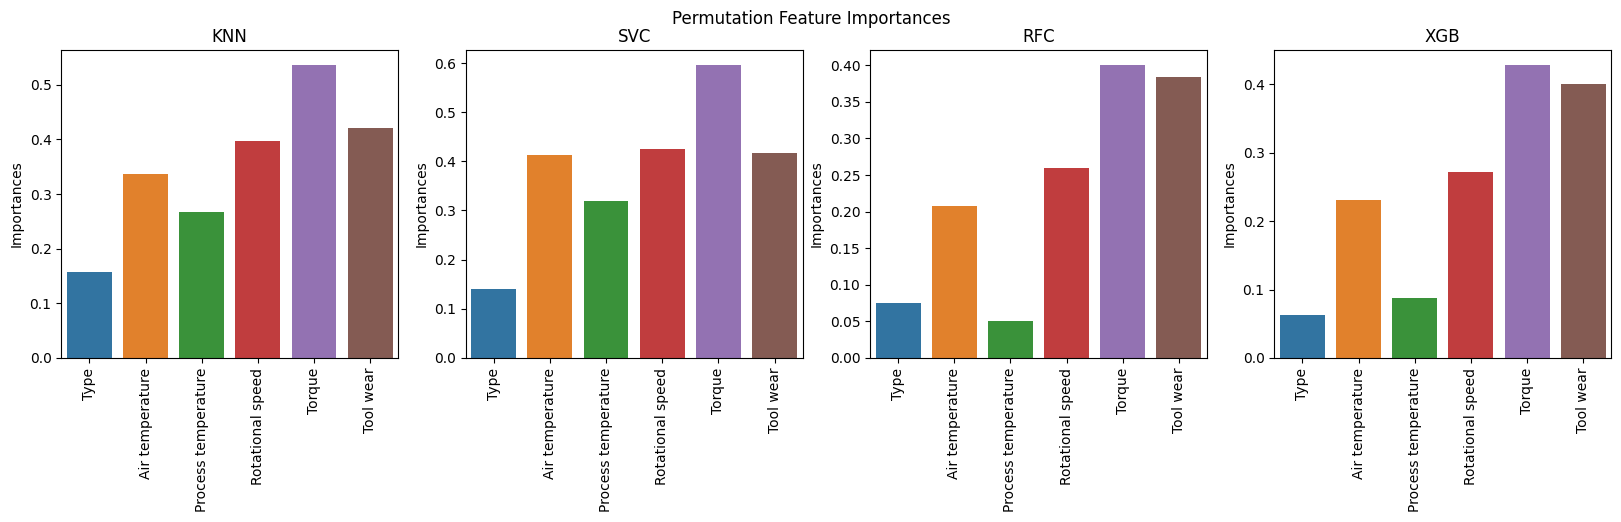

In [56]:
# Evaluate Permutation Feature Importances
f2_scorer = make_scorer(fbeta_score, pos_label=1, beta=2)
importances = pd.DataFrame()
for clf in fitted_models_binary:
    result = permutation_importance(clf, X_train,y_train['Target'],
                                  scoring=f2_scorer,random_state=0)
    result_mean = pd.Series(data=result.importances_mean, index=X.columns)
    importances = pd.concat(objs=[importances,result_mean],axis=1)
importances.columns = clf_str

# Barplot of Feature Importances
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Permutation Feature Importances')
for j, name in enumerate(importances.columns):
    sns.barplot(ax=axs[j], x=importances.index, y=importances[name].values)
    axs[j].tick_params('x',labelrotation=90)
    axs[j].set_ylabel('Importances')
    axs[j].title.set_text(str(name))
plt.show()


Validation set metrics:
ACC    0.931
AUC    0.982
F1     0.921
F2     0.926
dtype: float64
Test set metrics:
ACC    0.921
AUC    0.982
F1     0.905
F2     0.914
dtype: float64


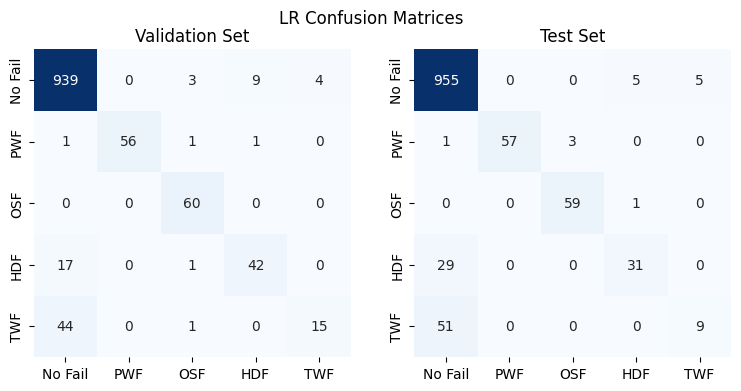

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
No Failure,1.855031,0.230032,2.699824,0.101199,0.057890,0.276945
Power Failure,0.716820,0.843122,1.015796,862.620491,2446.639938,0.743269
Tool Wear Failure,0.043203,0.206372,3.098425,0.141995,8.608034,357.347205
Overstrain Failure,0.706160,4352.326205,0.003768,0.000510,0.408232,0.784572
Heat Dissipation Failure,1.163004,1.357419,0.757997,0.277148,0.119641,613.561740


In [57]:
# multiclass classification
lr = LogisticRegression(random_state=0,multi_class='ovr')
lr.fit(X_train, y_train['Failure Type'])
y_val_lr = lr.predict(X_val)
y_test_lr = lr.predict(X_test)

# Validation metrics
cm_val_lr, metrics_val_lr = eval_preds(lr,X_val,y_val,y_val_lr,'multi_class')
cm_test_lr, metrics_test_lr = eval_preds(lr,X_test,y_test,y_test_lr,'multi_class')
print('Validation set metrics:',metrics_val_lr, sep='\n')
print('Test set metrics:',metrics_test_lr, sep='\n')

cm_lr = [cm_val_lr, cm_test_lr]
cm_labels = ['No Fail','PWF','OSF','HDF','TWF']
# Show Confusion Matrices
fig, axs = plt.subplots(ncols=2, figsize=(9,4))
fig.suptitle('LR Confusion Matrices')
for j, title in enumerate(['Validation Set', 'Test Set']):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_lr[j], annot=True,
              fmt='d', cmap='Blues', cbar=False)
    axs[j].title.set_text(title)
    axs[j].set_xticklabels(cm_labels)
    axs[j].set_yticklabels(cm_labels)
plt.show()

# Odds for interpretation
odds_df = pd.DataFrame(data = np.exp(lr.coef_), columns = X_train.columns,
                       index = df_res['Failure Type'].unique())
odds_df

In [58]:
# Models
knn = KNeighborsClassifier()
svc = SVC(decision_function_shape='ovr')
rfc = RandomForestClassifier()
xgb = XGBClassifier()
clf = [knn,svc,rfc,xgb]
clf_str = ['KNN','SVC','RFC','XGB']

knn_params = {'n_neighbors':[1,3,5,8,10]}
svc_params = {'C': [1, 10, 100],
              'gamma': [0.1,1],
              'kernel': ['rbf'],
              'probability':[True],
              'random_state':[0]}
rfc_params = {'n_estimators':[100,300,500,700],
              'max_depth':[5,7,10],
              'random_state':[0]}
xgb_params = {'n_estimators':[100,300,500],
              'max_depth':[5,7,10],
              'learning_rate':[0.01,0.1],
              'objective':['multi:softprob']}

params = pd.Series(data=[knn_params,svc_params,rfc_params,xgb_params],
                    index=clf)


# Tune hyperparameters with GridSearch (estimated time 8-10m)
print('GridSearch start')
fitted_models_multi = []
for model, model_name in zip(clf, clf_str):
    print('Training '+str(model_name))
    fit_model = tune_and_fit(model,X_train,y_train,params[model],'multi_class')
    fitted_models_multi.append(fit_model)

GridSearch start
Training KNN
Best params: {'n_neighbors': 1}
Training time: 0m 5s
Training SVC
Best params: {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Training time: 2m 28s
Training RFC
Best params: {'max_depth': 10, 'n_estimators': 500, 'random_state': 0}
Training time: 5m 26s
Training XGB
Best params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'objective': 'multi:softprob'}
Training time: 3m 35s


In [113]:
params

KNeighborsClassifier()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             {'n_neighbors': [1, 3, 5, 8, 10]}
SVC()                                                                                                                                                                              

In [92]:
fitted_models_multi[3].best_estimator_.predict()

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)>

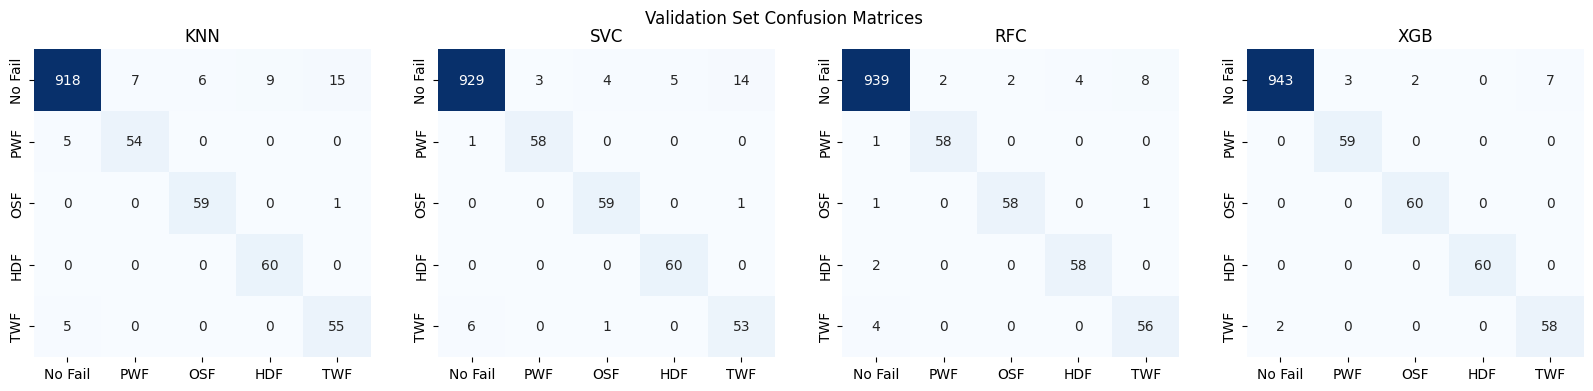

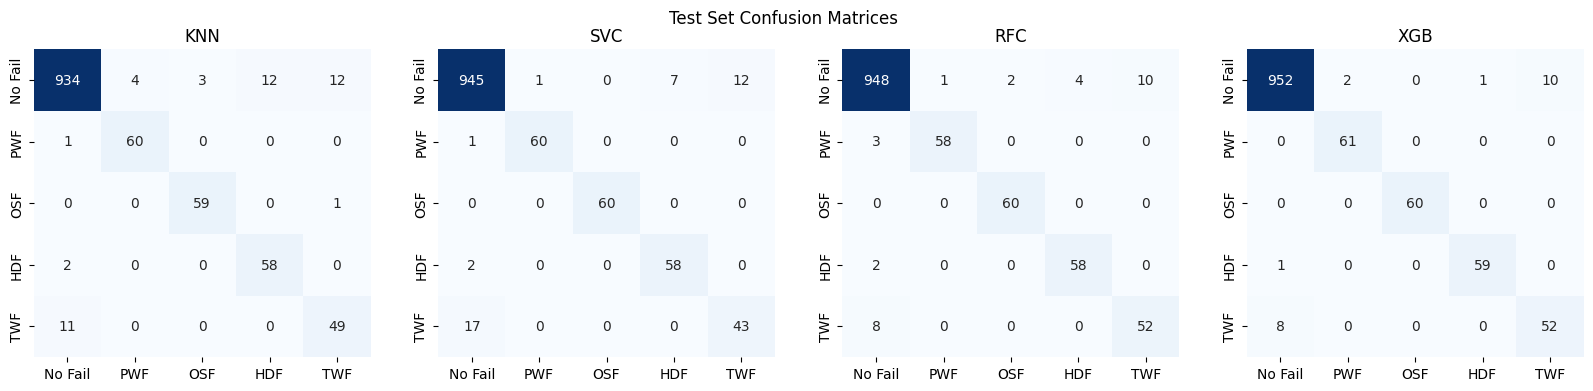


Validation scores:
       KNN    SVC    RFC    XGB
ACC  0.960  0.971  0.979  0.988
AUC  0.962  0.997  0.998  0.999
F1   0.961  0.971  0.979  0.988
F2   0.960  0.971  0.979  0.988
Test scores:
       KNN    SVC    RFC    XGB
ACC  0.962  0.967  0.975  0.982
AUC  0.957  0.994  0.997  0.998
F1   0.962  0.966  0.975  0.982
F2   0.962  0.967  0.975  0.982


In [59]:
 #Create evaluation metrics

task = 'multi_class'
y_pred_val, cm_dict_val, metrics_val = predict_and_evaluate(
    fitted_models_multi,X_val,y_val,clf_str,task)
y_pred_test, cm_dict_test, metrics_test = predict_and_evaluate(
    fitted_models_multi,X_test,y_test,clf_str,task)

# Show Validation Confusion Matrices
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Validation Set Confusion Matrices')
for j, model_name in enumerate(clf_str):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_dict_val[model_name], annot=True,
                fmt='d', cmap='Blues', cbar=False)
    ax.title.set_text(model_name)
    ax.set_xticklabels(cm_labels)
    ax.set_yticklabels(cm_labels)
plt.show()

# Show Test Confusion Matrices
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Test Set Confusion Matrices')
for j, model_name in enumerate(clf_str):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_dict_test[model_name], annot=True,
                fmt='d', cmap='Blues', cbar=False)
    ax.title.set_text(model_name)
    ax.set_xticklabels(cm_labels)
    ax.set_yticklabels(cm_labels)
plt.show()

# Print scores
print('')
print('Validation scores:', metrics_val, sep='\n')
print('Test scores:', metrics_test, sep='\n')

In [107]:
y_pred_val

,KNN,SVC,RFC,XGB
0,3,3,3,3
1,3,3,3,3
2,4,4,4,4
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1189,1,1,1,1
1190,0,0,0,0
1191,0,0,0,0
1192,0,0,0,0


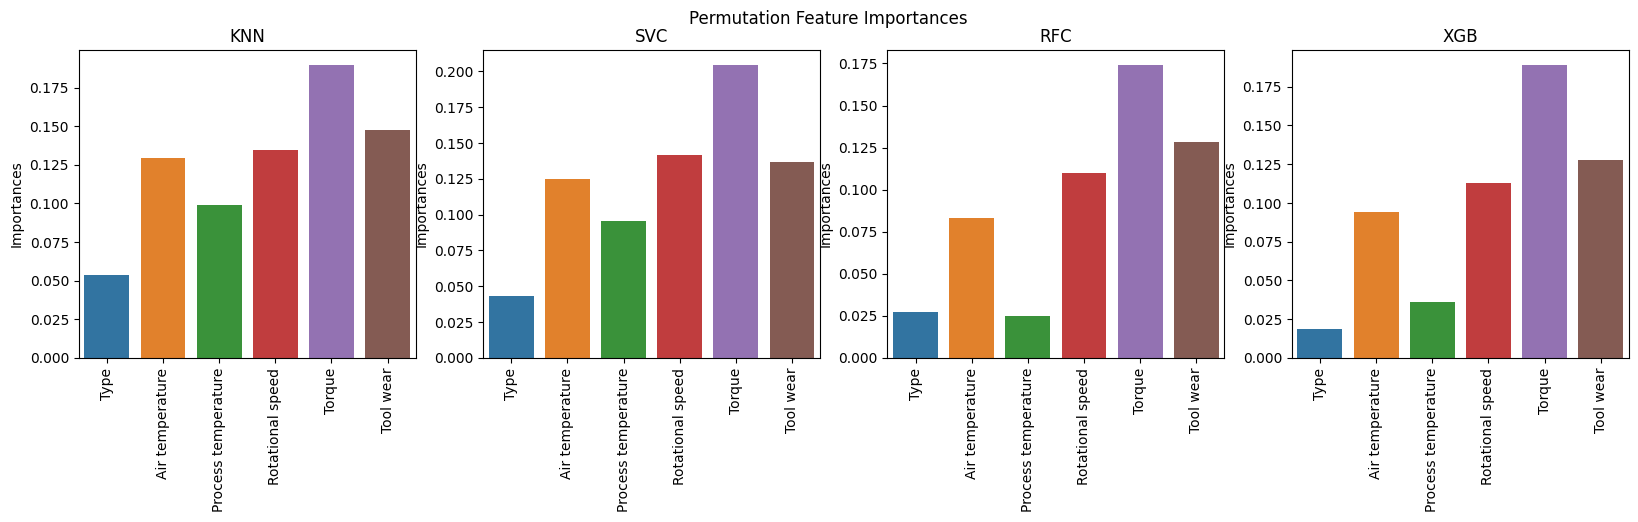

In [60]:
# Evaluate Permutation Feature Importances
f2_scorer = make_scorer(fbeta_score, beta=2, average='weighted')
importances = pd.DataFrame()
for clf in fitted_models_multi:
    result = permutation_importance(clf, X_train,y_train['Failure Type'],
                                  scoring=f2_scorer,random_state=0)
    result_mean = pd.Series(data=result.importances_mean, index=X.columns)
    importances = pd.concat(objs=[importances,result_mean],axis=1)

importances.columns = clf_str

# Barplot of Feature Importances
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Permutation Feature Importances')
for j, name in enumerate(importances.columns):
    sns.barplot(ax=axs[j], x=importances.index, y=importances[name].values)
    axs[j].tick_params('x',labelrotation=90)
    axs[j].set_ylabel('Importances')
    axs[j].title.set_text(str(name))
plt.show()

In [61]:
!pip install graphviz

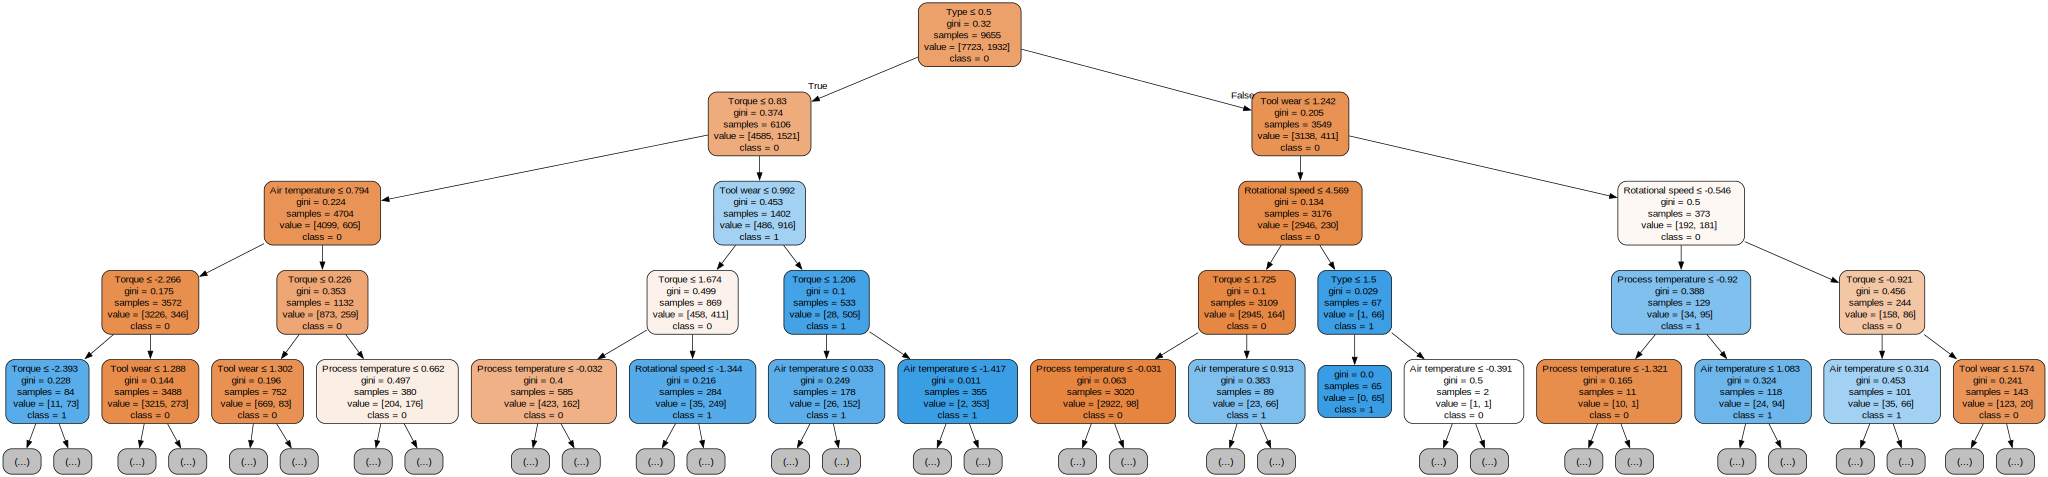

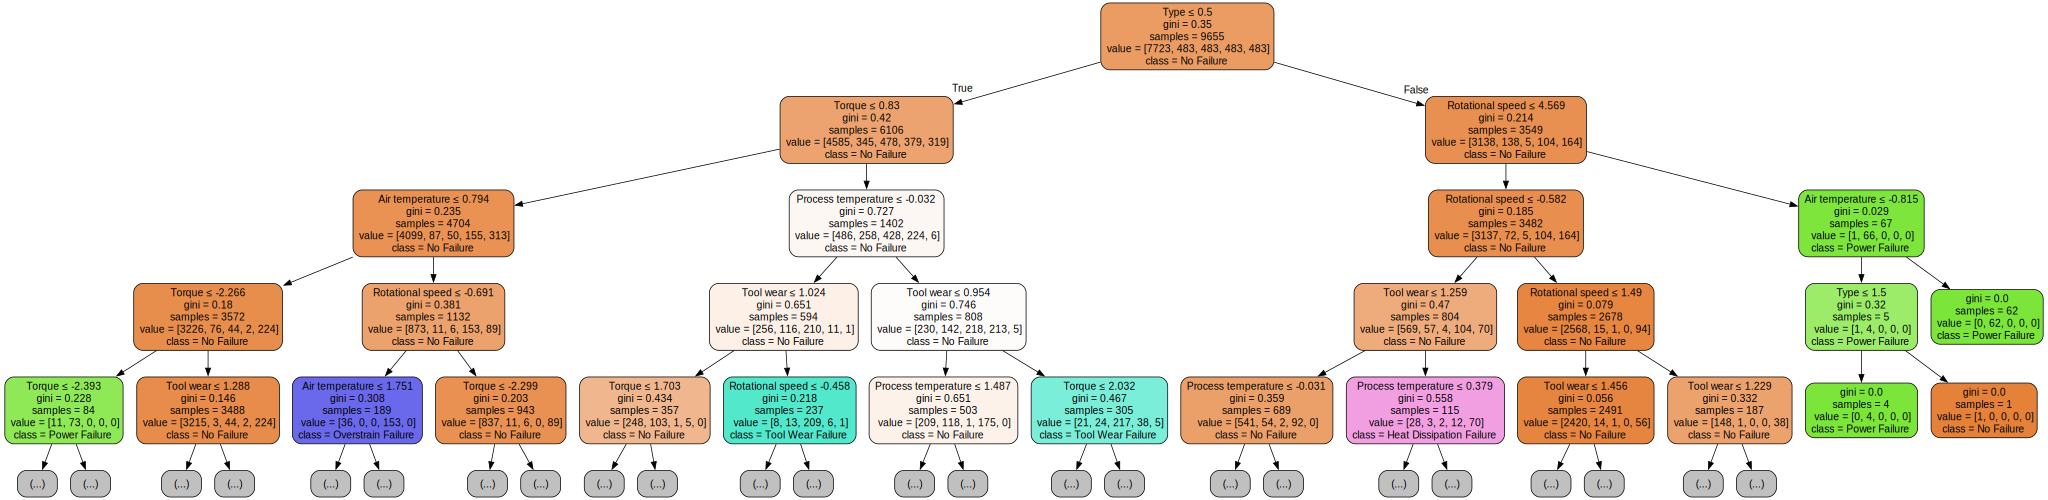

In [62]:
# Random Forest Decision Path
from sklearn import tree
import graphviz

tree_binary = fitted_models_binary[2].best_estimator_.estimators_[0]
tree_multi = fitted_models_multi[2].best_estimator_.estimators_[0]
trees = [tree_binary,tree_multi]
targets = ['Target', 'Failure Type']
for decision_tree, target in zip(trees, targets):
    decision_tree.fit(X_train,y_train[target])
    classes = list(map(str,df_res[target].unique()))

    dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                  feature_names=X.columns,  
                                  class_names=classes,
                                  filled=True, rounded=True,  
                                  special_characters=True,
                                  max_depth=4)  # uncomment to see full tree
    graph = graphviz.Source(dot_data)
    graph.render(target+" Classification tree")
    display(graph)

### Conclusions 
According to the analyses carried out and the results obtained, it is possible to make some conclusive considerations related to this project.

We decided to tackle two tasks: predict whether a machine will fail or not and predict the type of failure that will occur. Before developing the models we did data preprocessing to ensure the validity of the assumptions of applicability of the models and ensure the best performances. Briefly, in preprocessing phase we have deleted some ambiguous samples, we applied a label encoding to the categorical columns and then we performed the scaling of the columns with StandardScaler. We also noticed the presence of some data points which at first we referred as outliers but later turned out to be part of the natural variance of the data and played an important role in the classification task. Then we ran PCA and found that most of the variance is explained by the first three components, that can be represented as the following features: combination of the two Temperatures, Machine Power (product of Rotational Speed and Torque) and Tool Wear. In according to this, we found that these are the features that contribute the most in the predictions when apply the models. Contrary to logical predictions, we demonstrated that the machine’s type does not affect the presence of failure.

At the end, we can conclude that for both task the chosen models perform very well. For both tasks the best model is XGBoost and the worst is KNN; however the response time of KNN is instant while XGBoost takes more time and this further increase when we proceed with the multi-class classification task. The choice of the model depends on the needs of the company: for faster application one can use KNN while if one cares more about accuracy one can use XGBoost.

In [145]:
import pickle

pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(xgb_model, pickle_out)
pickle_out.close()

In [67]:
with open('C:\\Users\\ADMIN\Desktop\\Machine Learning\\00 Buisness Cases\\Predictive Maintenance\\classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [ ]:
import pickle

pickle_out = open("scaling_model.pkl", mode = "wb")
pickle.dump(sc, pickle_out)
pickle_out.close()

In [ ]:
298.8,308.9,1455,41.3,208
298.8,308.9,1461,47.9,206
298.9,308.9,1422,47.6,15
298.1,308.6,551,42.8


In [116]:
xgb_model=XGBClassifier(n_estimator=300,learning_rate=0.1,max_depth=10,objective='multi:softprob')

In [120]:
xgb_model.fit(X_val,y_val['Failure Type'])

D:\CondaSetup\envs\myfirstenv\lib\site-packages\xgboost\core.py:160: UserWarning: [20:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=300, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)